## Imports

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline

In [34]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## Data

In [3]:
data = pd.read_csv('/btc_hourly_data.csv')
data.head()

,Time,price,volume,label
0,2020-03-23 03:00:00 UTC,5989.014414,1.233530e+07,5982.209648
1,2020-03-23 04:00:00 UTC,5982.209648,1.469059e+07,5945.645879
2,2020-03-23 05:00:00 UTC,5945.645879,7.071329e+06,5958.296062
3,2020-03-23 06:00:00 UTC,5958.296062,8.727236e+06,5938.628824
4,2020-03-23 07:00:00 UTC,5938.628824,1.074222e+07,5878.498745


In [38]:
X = data.drop(columns=['Time', 'label'])
y = data['label']
X.head()

,price,volume
0,5989.014414,1.233530e+07
1,5982.209648,1.469059e+07
2,5945.645879,7.071329e+06
3,5958.296062,8.727236e+06
4,5938.628824,1.074222e+07


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

## RandomForest

### Raw Data

In [13]:
reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 1488.1565221152514
MAE: 26.123513691833367


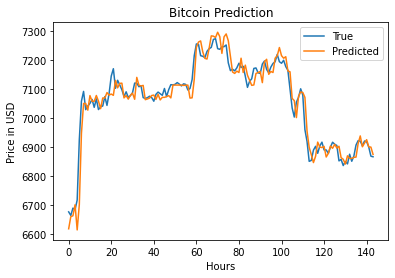

In [9]:
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

### Z-Score Normalized Data

In [50]:
normalized_data = data.drop(columns=['Time']).apply(zscore)
X = normalized_data.drop(columns=['label'])
y = normalized_data['label']
mean, std = data['label'].mean(), data['label'].std()
X.head()

,price,volume
0,-2.474766,-0.203833
1,-2.495044,-0.037993
2,-2.604007,-0.574479
3,-2.566308,-0.457883
4,-2.624918,-0.316005


MSE: 0.013308471177257105
MAE: 0.07856300238926102


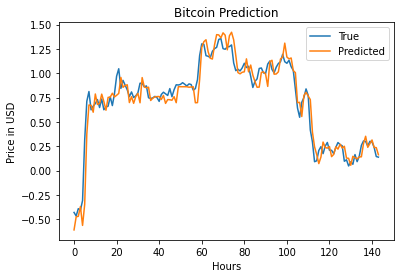

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

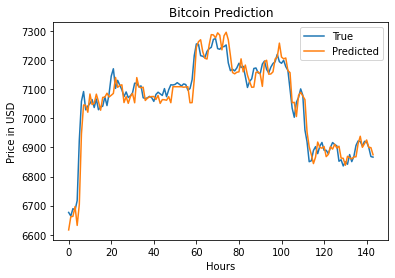

In [55]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

## Neural Networks

In [56]:
normalized_data = data.drop(columns=['Time']).apply(zscore)
X = normalized_data.drop(columns=['label'])
y = normalized_data['label']
mean, std = data['label'].mean(), data['label'].std()
X.head()

,price,volume
0,-2.474766,-0.203833
1,-2.495044,-0.037993
2,-2.604007,-0.574479
3,-2.566308,-0.457883
4,-2.624918,-0.316005


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.


In [0]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
#train model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Train on 574 samples, validate on 144 samples
Epoch 1/50
574/574 [==============================] - 0s 108us/step - loss: 0.0195 - val_loss: 0.0125
Epoch 2/50
574/574 [==============================] - 0s 84us/step - loss: 0.0196 - val_loss: 0.0126
Epoch 3/50
574/574 [==============================] - 0s 77us/step - loss: 0.0194 - val_loss: 0.0127
Epoch 4/50
574/574 [==============================] - 0s 77us/step - loss: 0.0196 - val_loss: 0.0125
Epoch 5/50
574/574 [==============================] - 0s 78us/step - loss: 0.0194 - val_loss: 0.0129
Epoch 6/50
574/574 [==============================] - 0s 88us/step - loss: 0.0195 - val_loss: 0.0128
Epoch 7/50
574/574 [==============================] - 0s 82us/step - loss: 0.0193 - val_loss: 0.0125
Epoch 8/50
574/574 [==============================] - 0s 79us/step - loss: 0.0195 - val_loss: 0.0126
Epoch 9/50
574/574 [==============================] - 0s 97us/step - loss: 0.0194 - val_loss: 0.0127
Epoch 10/50
574/574 [=======================

MSE: 0.01231683719818933
MAE: 0.0715114193056824


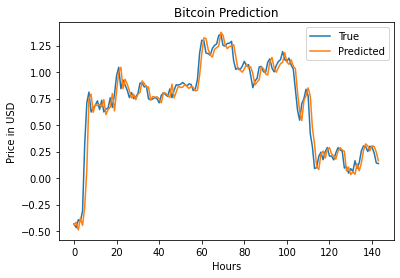

In [68]:

y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 1377.0197923193605
MAE: 23.910896225806134


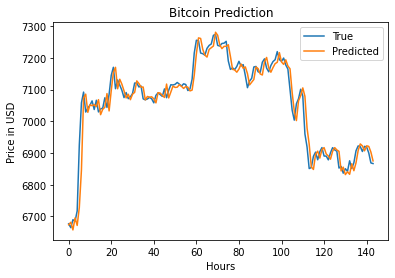

In [69]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [74]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test))

Train on 574 samples, validate on 144 samples
Epoch 1/100
574/574 [==============================] - 0s 232us/step - loss: 0.2094 - val_loss: 0.0140
Epoch 2/100
574/574 [==============================] - 0s 86us/step - loss: 0.0467 - val_loss: 0.0298
Epoch 3/100
574/574 [==============================] - 0s 99us/step - loss: 0.0339 - val_loss: 0.0237
Epoch 4/100
574/574 [==============================] - 0s 109us/step - loss: 0.0227 - val_loss: 0.0131
Epoch 5/100
574/574 [==============================] - 0s 86us/step - loss: 0.0219 - val_loss: 0.0117
Epoch 6/100
574/574 [==============================] - 0s 103us/step - loss: 0.0206 - val_loss: 0.0174
Epoch 7/100
574/574 [==============================] - 0s 93us/step - loss: 0.0225 - val_loss: 0.0139
Epoch 8/100
574/574 [==============================] - 0s 86us/step - loss: 0.0199 - val_loss: 0.0118
Epoch 9/100
574/574 [==============================] - 0s 82us/step - loss: 0.0212 - val_loss: 0.0133
Epoch 10/100
574/574 [===========

MSE: 0.01231683719818933
MAE: 0.0715114193056824


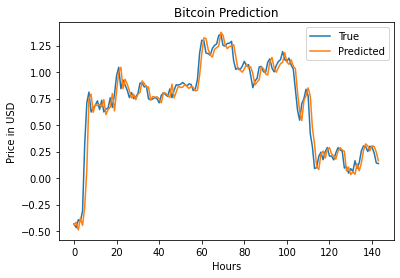

In [75]:
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 1377.0197923193605
MAE: 23.910896225806134


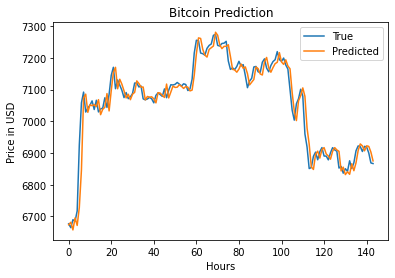

In [76]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

### Applying LSTM

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

In [0]:
X_train2 = X_train2.reshape(X_train2.shape[0], 2, 1)

In [151]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model1 = Sequential()
model1.add(LSTM(30, input_shape=(2,1), return_sequences=True))
model1.add(LSTM(30))
model1.add(Dense(1, activation='relu'))

model1.compile(optimizer="adam", loss="mean_squared_error")

model1.fit(X_train2, y_train2, epochs=50, shuffle=False)

model.evaluate(X_test2, y_test2)

Epoch 1/50
574/574 [==============================] - 1s 1ms/step - loss: 1.0777
Epoch 2/50
574/574 [==============================] - 0s 440us/step - loss: 1.0407
Epoch 3/50
574/574 [==============================] - 0s 490us/step - loss: 0.9983
Epoch 4/50
574/574 [==============================] - 0s 489us/step - loss: 0.9510
Epoch 5/50
574/574 [==============================] - 0s 486us/step - loss: 0.8952
Epoch 6/50
574/574 [==============================] - 0s 469us/step - loss: 0.8391
Epoch 7/50
574/574 [==============================] - 0s 456us/step - loss: 0.7984
Epoch 8/50
574/574 [==============================] - 0s 503us/step - loss: 0.7796
Epoch 9/50
574/574 [==============================] - 0s 465us/step - loss: 0.7694
Epoch 10/50
574/574 [==============================] - 0s 354us/step - loss: 0.7611
Epoch 11/50
574/574 [==============================] - 0s 339us/step - loss: 0.7541
Epoch 12/50
574/574 [==============================] - 0s 337us/step - loss: 0.7490
Epo

0.012316837285955748

MSE: 0.01645313457794809
MAE: 0.08789492811617095


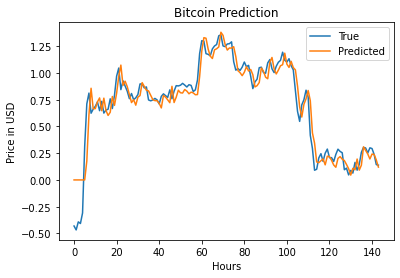

In [152]:
X_test2 = X_test2.reshape(X_test2.shape[0], 2, 1)
y_pred2 = model1.predict(X_test2)
print('MSE:', mean_squared_error(y_test2, y_pred2))
print('MAE:', mean_absolute_error(y_test2, y_pred2))

plt.plot(y_test2, label='True')
plt.plot(y_pred2, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 1839.4571389360108
MAE: 29.38896658808382


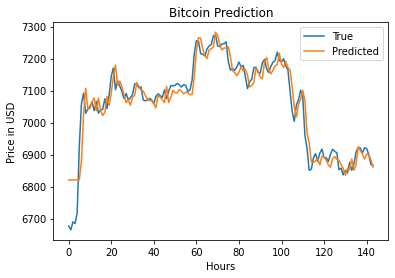

In [166]:
y_pred_org1 = (y_pred2 * std) + mean
y_test_org1 = (y_test2 * std) + mean
print('MSE:', mean_squared_error(y_test_org1, y_pred_org1))
print('MAE:', mean_absolute_error(y_test_org1, y_pred_org1))
plt.plot(y_test_org1, label='True')
plt.plot(y_pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 0.005731397534949879
MAE: 0.04919733305018059


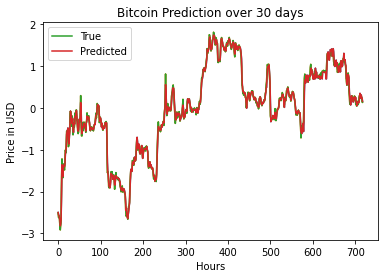

In [165]:
pred = reg.predict(X)
plt.plot(pred)
plt.plot(y)
print('MSE:', mean_squared_error(y, pred))
print('MAE:', mean_absolute_error(y, pred))
plt.plot(y, label='True')
plt.plot(pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction over 30 days')
plt.legend()

MSE: 640.7691938625039
MAE: 16.449856221667915


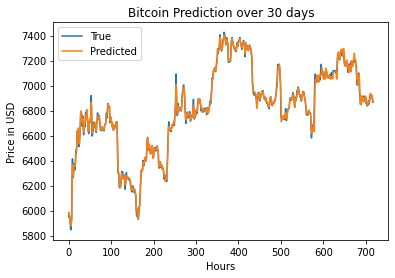

In [167]:
pred_org1 = (pred * std) + mean
y_org1 = (y * std) + mean
print('MSE:', mean_squared_error(y_org1, pred_org1))
print('MAE:', mean_absolute_error(y_org1, pred_org1))
plt.plot(y_org1, label='True')
plt.plot(pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction over 30 days')
plt.legend()